## creation of model


In [123]:
from modeci_mdf.interfaces import *
from modeci_mdf.mdf import *
from sklearn.datasets import load_iris



In [124]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import joblib
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
# Load the pre-trained model
model = joblib.load('model_MDF.joblib')


## creating model and one graph

In [125]:
from modeci_mdf.mdf import *
import numpy as np

model=Model(id="my_model")
my_graph = Graph(id="Mygraph")

#append the Graph object to the Model
model.graphs.append(my_graph)

## creating the node 1

In [126]:
node1 = Node(id="node1",
              functions=[Function("output = input1 * input2"),
                          Function("derivative = input2"), 
                          Function("condition = input1 > 0")])


#creating input port
node1.input_ports = [InputPort(id="input1"),
                   InputPort(id="input2")]


#creation of output port
node1.output_ports=[OutputPort(id="output")]

# Add node to the graph
my_graph.nodes.append(node1)

#printing the node
print(my_graph.to_yaml())



Mygraph:
    nodes:
        node1:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 * input2: {}
                derivative = input2: {}
                condition = input1 > 0: {}
            output_ports:
                output: {}



## Creating of node 2

In [127]:
node2 = Node(id="node2", 
             functions=[Function("output = input1 + input2"), 
                        Function("derivative = input1"), 
                        Function("condition = input2 < 1")])


#creating input port
node2.input_ports = [InputPort(id="input1"),
                           InputPort(id="input2")]


#creation of output port
node2.output_ports=[OutputPort(id="output")]

# Add node to the graph
my_graph.nodes.append(node2)

#printing the node
print(my_graph.to_yaml())


Mygraph:
    nodes:
        node1:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 * input2: {}
                derivative = input2: {}
                condition = input1 > 0: {}
            output_ports:
                output: {}
        node2:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 + input2: {}
                derivative = input1: {}
                condition = input2 < 1: {}
            output_ports:
                output: {}



## Creating of node 3

In [128]:
node3 = Node(id="node3",
              functions=[Function("output = input1 - input2"), 
                         Function("derivative = input1"), 
                         Function("condition = input2 > 0")])

#creating input port
node3.input_ports=[InputPort(id="input1"), 
                   InputPort(id="input2")]


#creation of output port
node3.output_ports=[OutputPort(id="output")]

# Add node to the graph
my_graph.nodes.append(node3)

#printing the node
print(my_graph.to_yaml())

Mygraph:
    nodes:
        node1:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 * input2: {}
                derivative = input2: {}
                condition = input1 > 0: {}
            output_ports:
                output: {}
        node2:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 + input2: {}
                derivative = input1: {}
                condition = input2 < 1: {}
            output_ports:
                output: {}
        node3:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 - input2: {}
                derivative = input1: {}
                condition = input2 > 0: {}
            output_ports:
                output: {}



## defining th econnection </br>
## between the nodes of input and output of pretrained model

In [129]:
# Create a node that runs the sklearn model
model_node = Node(id="model_node", 
                  functions=[Function("output = input * model.predict([input])[0]")])


In [114]:
import pickle
from sklearn.linear_model import LinearRegression

# Load the saved model
with open('ML_Model.pkl', 'rb') as f:
    model = pickle.load(f)


 ## creating edges between the nodes

In [130]:
from modeci_mdf.utils import simple_connect

# Connect node1 to node2
e1 = simple_connect(node1, node2, my_graph)

# Connect node2 to node3
e2 = simple_connect(node2, node3, my_graph)

# Connect node1 to node3
e3 = simple_connect(node1, node3, my_graph)

# Print the current structure
print(my_graph.to_yaml())

Mygraph:
    nodes:
        node1:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 * input2: {}
                derivative = input2: {}
                condition = input1 > 0: {}
            output_ports:
                output: {}
        node2:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 + input2: {}
                derivative = input1: {}
                condition = input2 < 1: {}
            output_ports:
                output: {}
        node3:
            input_ports:
                input1: {}
                input2: {}
            functions:
                output = input1 - input2: {}
                derivative = input1: {}
                condition = input2 > 0: {}
            output_ports:
                output: {}
    edges:
        edge_node1_node2:
            sender: node1
            receiver: n

## Save the model

In [131]:
model.to_json_file("ML_TO MDF_Model.json")
model.to_yaml_file("ML_TO_MDF_Model.yaml")

'ML_TO_MDF_Model.yaml'

## Generate a graph image from the model

Converting MDF graph: Mygraph to graphviz (level: 3, format: png)
    Node: node1
    Node: node2
    Node: node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node2_node3 connects node2 to node3
    Edge: edge_node1_node3 connects node1 to node3
Written graph image to: ML_TO_MDF_Model.png


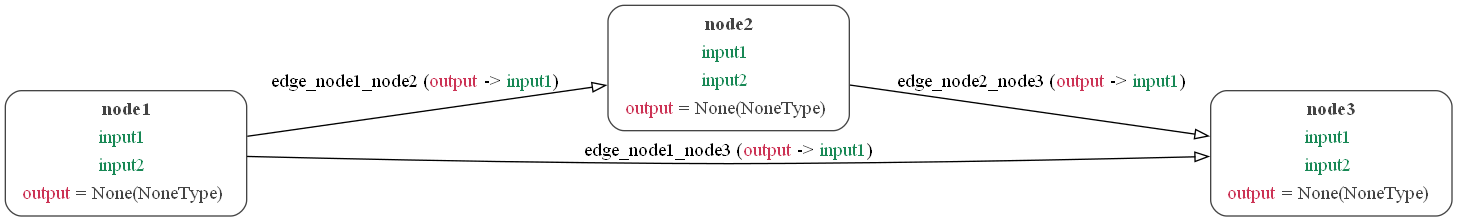

In [132]:
model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="ML_TO_MDF_Model",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="ML_TO_MDF_Model.png")

## Execute the graph and print the values  <a class="anchor" id="h3"></a>

### Execute the graph with the current parameter values 

In [136]:
from modeci_mdf.execution_engine import EvaluableGraph

 ## Instantiate an EvaluableGraph object
graph = EvaluableGraph(my_graph)

# Evaluate the graph
graph.evaluate()

# Access the current value of the desired nodes
node1_output = graph.enodes["node1"].evaluable_outputs["output"].curr_value
node2_output = graph.enodes["node2"].evaluable_outputs["output"].curr_value
node3_output = graph.enodes["node3"].evaluable_outputs["output"].curr_value

# Print the values of the desired nodes
print(f"Node 1 output: {node1_output}")
print(f"Node 2 output: {node2_output}")
print(f"Node 3 output: {node3_output}")



Init graph: Mygraph
Evaluating graph: Mygraph, root nodes: ['node1'], with array format numpy


TypeError: argument of type 'NoneType' is not iterable

In [134]:
from modeci_mdf.execution_engine import EvaluableGraph

eg = EvaluableGraph(my_graph, verbose=False)
eg.evaluate()

for edge in my_graph.edges:
    print(f"Output of edge {edge.sender} to {edge.receiver}: {edge.evaluable_outputs['output'].curr_value}")



Init graph: Mygraph
Evaluating graph: Mygraph, root nodes: ['node1'], with array format numpy


TypeError: argument of type 'NoneType' is not iterable

In [ ]:
import numpy as np 
#Convert the value of the parameter to a numpy array
node1.get_parameter('level').value = np.array([[1,2],[3,4]])

eg.evaluate()

AttributeError: 'Node' object has no attribute 'get_parameter'

In [ ]:
from modeci_mdf.mdf import Model, Node, InputPort, OutputPort, Function

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Load the pre-trained model
model = joblib.load('model_file.joblib')

# Define the nodes
node1 = Node(id="node1", functions=[Function("output = input1 * input2")])
node2 = Node(id="node2", functions=[Function("output = input1 + input2")])
node3 = Node(id="node3", functions=[Function("output = input1 - input2")])

# Define the input and output ports for each node
node1.inputs = [InputPort(id="input1"), InputPort(id="input2")]
node1.outputs = [OutputPort(id="output")]

node2.inputs = [InputPort(id="input1"), InputPort(id="input2")]
node2.outputs = [OutputPort(id="output")]

node3.inputs = [InputPort(id="input1"), InputPort(id="input2")]
node3.outputs = [OutputPort(id="output")]

# Define the connections between the nodes based on the inputs and outputs of the pre-trained model
node1.inputs[0].source = None
node1.inputs[1].source = None
node1.outputs[0].targets = [node2.inputs[0], node3.inputs[0]]

node2.inputs[0].source = node1.outputs[0]
node2.inputs[1].source = None
node2.outputs[0].targets = None

node3.inputs[0].source = node1.outputs[0]
node3.inputs[1].source = None
node3.outputs[0].targets = None

# Create the MDF model and add the nodes
mdf_model = Model(id="my_model")
mdf_model.nodes = [node1, node2, node3]


##  creating edges for the model 


In [ ]:

# Define  and edges
from modeci_mdf.utils import simple_connect

edge1 = simple_connect(node1.outputs[0], node2.inputs[0], my_graph)
edge2 = simple_connect(node2.outputs[0], node3.inputs[0], my_graph)

# Create the MDF model and add the nodes and edges

print(my_graph.to_yaml())



AttributeError: 'Node' object has no attribute 'outputs'

## creating edges between the system

In [ ]:
model.to_json_file("ML_Model_Testing.json")
model.to_yaml_file("ML_Model_Testing.yaml")

'ML_Model_Testing.yaml'

## Save the model

In [ ]:
model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="ML_Model_MDF_Graph",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="ML_Model_MDF_Graph.png")

Converting MDF graph: Mygraph to graphviz (level: 3, format: png)
    Node: node1
    Node: node2
    Node: node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node1_node3 connects node1 to node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node1_node3 connects node1 to node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node1_node3 connects node1 to node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node1_node3 connects node1 to node3
    Edge: edge_node1_node2 connects node1 to node2
    Edge: edge_node1_node3 connects node1 to node3


KeyboardInterrupt: 